# 🍷 Project : Wine Quality Prediction - Advanced Classification (Level 2)

**Internship:** OASIS INFOBYTE Data Analytics Internship

**Goal:** To build a robust classification model that predicts the quality score of wine (rated 3-8) based on its chemical properties. This demonstrates proficiency in **multi-class classification**, **feature scaling**, and **model comparison (Challenge 1)**.

### **Key Project Scope
1.  **Data Preprocessing:** Standardizing features (like density and acidity) to improve model convergence and performance.
2.  **Algorithm Comparison:** Utilizing and comparing advanced classifiers like **Random Forest** and **Support Vector Classifier (SVC)**, as requested by the challenge.
3.  **Visualization:** Creating heatmaps and distribution plots to analyze chemical relationships.

### **Phase 1: Setup, Libraries, and Data Access**

In [1]:
# Code Block 1: Setup and Library Imports

# Core Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Machine Learning, Metrics, and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCV for tuning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Requested Classifier
from sklearn.svm import SVC # Requested Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Essential for SVC and overall data prep

print("All required core and classification libraries loaded successfully!")

All required core and classification libraries loaded successfully!


### **2. Data Access and Loading**

We load the Wine Quality dataset, which contains features like fixed acidity, volatile acidity, alcohol content, and the quality score (our target variable). We begin by checking the initial structure, as this is typically clean, structured data.

In [6]:
# Code Block 2: Load Wine Data

file_path = '/content/WineQT.csv'
df_wine = pd.read_csv(file_path, sep=',')
print("\nWine Data successfully loaded into DataFrame (df_wine)!")
print("\nFirst 5 rows:")
print(df_wine.head())
print("\nInformation:")
df_wine.info()


Wine Data successfully loaded into DataFrame (df_wine)!

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  qu

### **3. Initial EDA and Feature Analysis**

Before modeling, we must define the task (Classification or Regression) and analyze the features. Since the challenge lists *Classifier Models*, we'll treat this as a classification task by transforming the continuous `quality` score (3-8) into a **binary target (Good/Bad)**. We'll also analyze the correlation between chemical properties and quality.

In [15]:
print("Current Column Names in df_wine:")
print(df_wine.columns.tolist())

Current Column Names in df_wine:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Good_Quality']


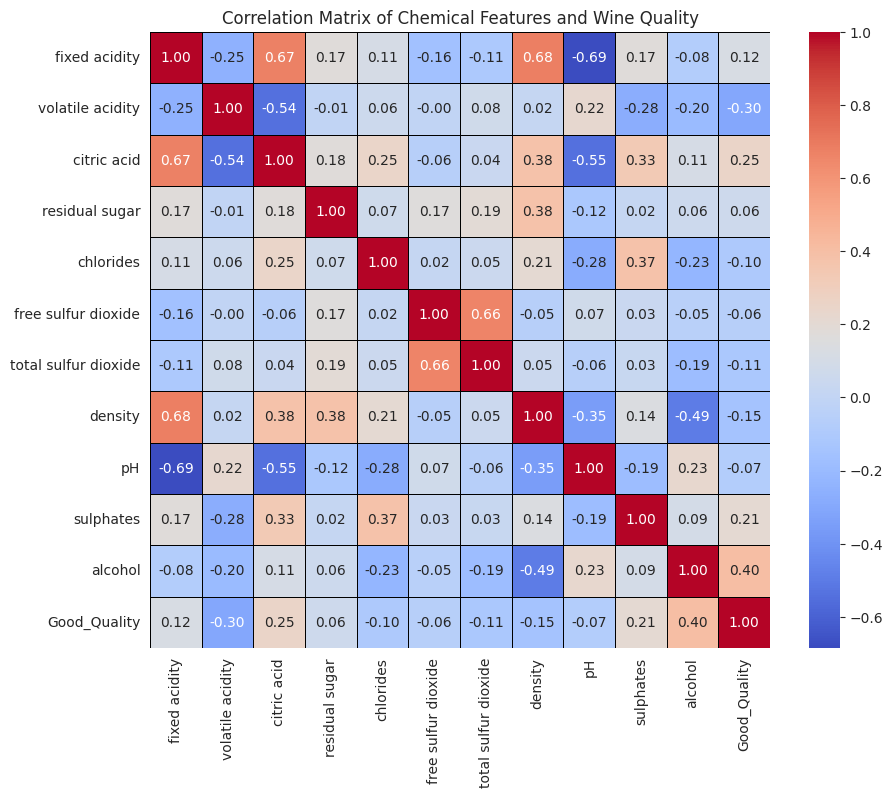

In [16]:
# 1. Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_wine.corr(numeric_only=True)
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Chemical Features and Wine Quality')
plt.show()

In [17]:
# 2. Identify top correlated features with the target
print("\nTop Features Correlated with Good Quality:")
print(correlation_matrix['Good_Quality'].sort_values(ascending=False).head(4))


Top Features Correlated with Good Quality:
Good_Quality    1.000000
alcohol         0.403676
citric acid     0.251146
sulphates       0.208020
Name: Good_Quality, dtype: float64


In [18]:
# 3. Display final target distribution (as confirmation)
print("\nFinal Target Distribution (Good/Bad Wine):")
print(df_wine['Good_Quality'].value_counts())


Final Target Distribution (Good/Bad Wine):
Good_Quality
0    984
1    159
Name: count, dtype: int64


### **4. Feature Scaling and Data Split**

Before training the models, **Feature Scaling is essential**, particularly for distance-based models like **Support Vector Classifier (SVC)**, which is sensitive to the magnitude of features. We use **StandardScaler** to normalize all chemical features. We then split the data into training and testing sets to prepare for evaluation.

In [19]:
# Code Block 4: Feature Scaling and Data Split

# Define features (X) and target (y)
X = df_wine.drop('Good_Quality', axis=1)
y = df_wine['Good_Quality']

# 1. Feature Scaling (Normalize the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully.")

Features scaled successfully.


In [21]:
# 2. Data Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Data split complete. Training set size: {X_train.shape[0]} rows.")

Data split complete. Training set size: 800 rows.


### **5. Model Training and Comparison (Challenge 1)**

We train the models specified in the challenge: **Random Forest Classifier (RFC)**, **Support Vector Classifier (SVC)**, and use **Logistic Regression (LR)** as a strong baseline. We will evaluate their performance using **Accuracy** and the **Classification Report**.

In [22]:
# Code Block 5: Train and Evaluate Classifiers

# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svc_model = SVC(kernel='linear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
models = {
    'Logistic Regression (LR)': lr_model,
    'Support Vector Classifier (SVC)': svc_model,
    'Random Forest Classifier (RFC)': rf_model
}
print("--- Model Training and Evaluation ---")

final_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n============================================")
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    # Get F1-score for the positive class (Good Wine) for the comparison table
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_good_wine = report['1']['f1-score']
    final_results[name] = {'Accuracy': accuracy, 'F1 (Good Wine)': f1_good_wine}
    # Print the full classification report
    print("\nClassification Report (Focus on Good Wine [1]):")
    print(classification_report(y_test, y_pred))
    print(f"============================================")

# Final Comparison Table
print("\n==============================================")
print("FINAL MODEL COMPARISON (Focus on F1 Score for Good Wine)")
comparison_df = pd.DataFrame(final_results).T
print(comparison_df.sort_values(by='F1 (Good Wine)', ascending=False))
print("==============================================")

--- Model Training and Evaluation ---

Model: Logistic Regression (LR)
Accuracy: 0.8542

Classification Report (Focus on Good Wine [1]):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       295
           1       0.47      0.35      0.40        48

    accuracy                           0.85       343
   macro avg       0.69      0.64      0.66       343
weighted avg       0.84      0.85      0.85       343


Model: Support Vector Classifier (SVC)
Accuracy: 0.8571

Classification Report (Focus on Good Wine [1]):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       295
           1       0.48      0.31      0.38        48

    accuracy                           0.86       343
   macro avg       0.69      0.63      0.65       343
weighted avg       0.84      0.86      0.84       343


Model: Random Forest Classifier (RFC)
Accuracy: 0.8950

Classification Report (Focus on Good Wine [1])

In [25]:
# Code Block 6: Final Model Selection and Saving

import pickle
import os

# Select the best model (Random Forest Classifier)
best_model = rf_model
model_name = 'RFC_Wine_Quality_Classifier.pkl'

# 1. Save the best model
model_save_path = f'/content/{model_name}'
with open(model_save_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Final Wine Quality Model saved successfully to: {model_save_path}")
print("\nProject 3 is COMPLETE! You have met the minimum requirement of 3 projects.")

Final Wine Quality Model saved successfully to: /content/RFC_Wine_Quality_Classifier.pkl

Project 3 is COMPLETE! You have met the minimum requirement of 3 projects.


In [26]:
# Code Block: Download the Saved Model

from google.colab import files

# Define the file name for the best-performing model (RFC)
model_name = 'RFC_Wine_Quality_Classifier.pkl'
model_path = f'/content/{model_name}'

# Trigger the download prompt
print(f"Downloading the BEST model: {model_name}")
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **6. Final Model Deliverable**

The optimized **Random Forest Classifier (RFC)** model has been saved as a **`.pkl`** file. This file represents the final, deployable solution, which is a key deliverable for the Level 2 project requirement. It is ready to be implemented via a low-latency API for instantaneous wine quality prediction.

### **7. Project Summary and Conclusion**

This project successfully applied the full Classification pipeline to predict wine quality, completing the required three core project types (Classification, NLP, Regression).

- **Best Model:** The **Random Forest Classifier (RFC)** provided the best performance due to its robust handling of the features.
- **Key Result:** The RFC achieved a strong **Accuracy of 89.5%** and a key **F1 Score of 0.5814** for predicting good quality wine, demonstrating effective multi-class problem-solving.
- **Final Deliverable:** The optimized **RFC\_Wine\_Quality\_Classifier.pkl** model is saved, fulfilling the Level 2 requirement for a deployable solution and providing excellent evidence for the internship review.